<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/15_Matplotlib_Scatter_Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Matplotlib Scatter Plots

Load in data.

In [7]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

We'll subset this data to only Data Analysts so we have more meaningful insights.

In [6]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

## Scatter Plot

### Notes

* `scatter()` - create a scatter plot of x vs y.
* Common parameters:
    * `x`, `y` - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
    * `s` - The size of each point. Can be a single size or an array for varying sizes.
    * `c` - Color of each marker. Can specify a single color or an array to have different colors for each point.
    * `marker` - The style of the marker. You can use markers like o, ^, *, etc.
    * `alpha` - The blending value of the markers, between 0 (transparent) and 1 (opaque).
* Syntax: `plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')`
* Scatter plots compare different categories or groups of data.

### Example

Create a scatter plot that plots the count of job postings using `job_skills` for each skill versus their median salary using `salary_year_avg`. The count will be on the x-axis while the salary year median will be on the y-axis.

In [8]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,120000.0,384849
python,125000.0,380909
aws,135000.0,145381
azure,125000.0,132527
r,119550.0,130892
tableau,111175.0,127213
excel,92500.0,127018
spark,140000.0,114609
power bi,102000.0,98147


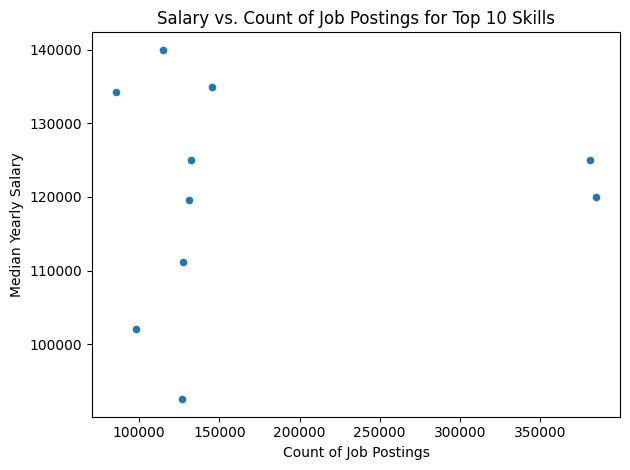

In [9]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

Now, if you notice this scatter plot isn't the most helpful because we actually **don't know** what skills are the top 10. Nothing is labeled. Don't worry we'll come back to this plot and clean it up.

### Add Annotations

#### Text
* `text`: Add text annotations to the plot.

#### Common Arguments
* `x`: The x-coordinate for the text
* `y`: The y-coordinate for the text
* `s`: The text to display
* `fontsize`: The font size of the text
* `color`: The color of the text
* `ha`: Horizontal alignment of the text
* `va`: Vertical alignment of the text

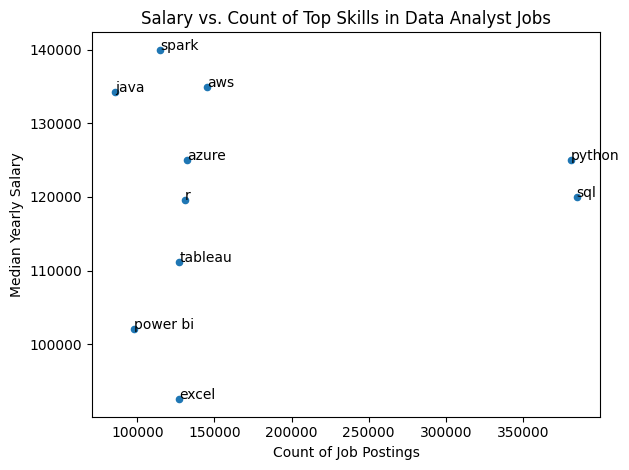

In [10]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()